In [58]:
# IMPORTS
from afinn import Afinn
from os import path
import matplotlib.pyplot as plt
# % matplotlib inline
import nltk as nt
import pandas as pd
# from PIL import Image
# from wordcloud import WordCloud #, STOPWORDS, ImageColorGenerator
import wordcloud as wc

# TODO: uncomment the following two lines for the first time you run this program!
nt.download('punkt')
nt.download('stopwords')

# matplotlib things
plt.figure(figsize=(3,6), dpi=60)
plt.style.use('seaborn-v0_8')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xiany\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xiany\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Figure size 180x360 with 0 Axes>

In [59]:
def pos(a): return a > 0.0
def neg(a): return a < 0.0
def neut(a): return a == 0.0

# Dealing With Data (2023)
1. RQ1 -- Done (Needs Revision)

In [60]:
# define some stopwords
stop = nt.corpus.stopwords.words('english')
for i in '$-@_.&+#!*\\(),\'"?:%':
	stop.append(i)

# read the data
rdata = pd.read_csv('Datafiniti_Hotel_Reviews.csv', header=0, sep=',', on_bad_lines='skip')

# extract the title and body text of each review into a large list
rtext, rtitle = rdata['reviews.text'].astype(str), rdata['reviews.title'].astype(str)

# remove "... More" from reviews (if it exists)
# suubstitute every instance of "... More" with an empty string
rtext = rtext.str.replace('((Bad|Good):)|(\\.\\.\\. More)', '', regex=True)

# tokenise, remove stop words and puncutation
rtext_tk = rtext.apply(nt.word_tokenize)
rtext_tk = rtext_tk.apply(lambda x: [wd for wd in x if wd.lower() not in stop])
rtext_flat = [i for sublist in rtext_tk for i in sublist]

# create a giant array for sentiments
rtext_stm = []

afn = Afinn() # initialise an afinn instance

# loop through the tokenised list and assign each word a score
for rtk in rtext_tk:
	sentiments = [afn.score(r) for r in rtk]
	rtext_stm.append(sentiments)

# get sentiment data in one big list
rtext_stm_flat = [i for sublist in rtext_stm for i in sublist]

# filter the sentiment data
stm_pos, stm_neut, stm_neg = list(filter(pos, rtext_stm_flat)), list(filter(neut, rtext_stm_flat)), list(filter(neg, rtext_stm_flat))
stm_cat = ['Positive', 'Neutral', 'Negative'] 
stm_totals = [len(stm_pos), len(stm_neut), len(stm_neg)]

stm_cat_bi = ["Positive", "Negative"] 
stm_totals_bi = [len(stm_pos), len(stm_neg)]

[Text(0, 0, '40,811'), Text(0, 0, '8,359')]

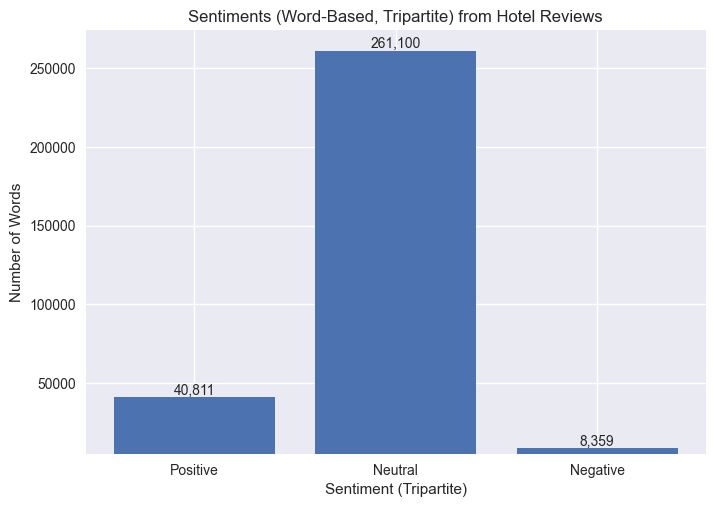

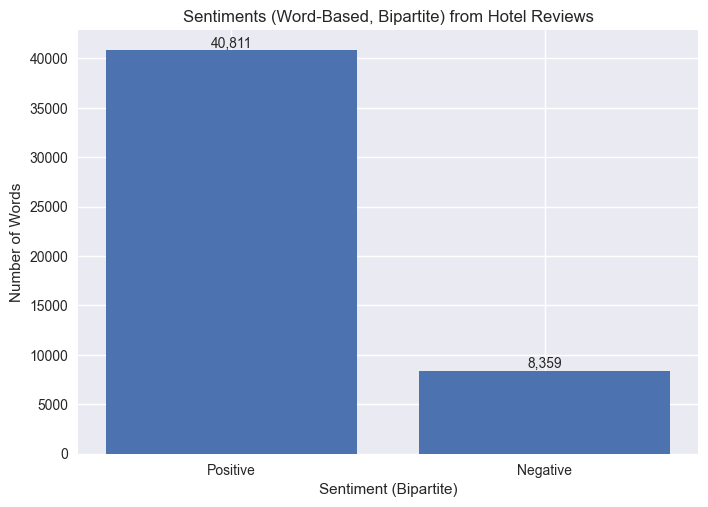

In [61]:
# tripartite sentiments
fig, ax = plt.subplots()
bar_container = ax.bar(stm_cat, stm_totals)
ax.set_title('Sentiments (Word-Based, Tripartite) from Hotel Reviews')
ax.set_xlabel('Sentiment (Tripartite)')
ax.set_ylabel('Number of Words')
ax.set_ylim(bottom=5000)
ax.bar_label(bar_container, fmt='{:,.0f}')

fig, ax = plt.subplots()
bar_container = ax.bar(stm_cat_bi, stm_totals_bi)
ax.set_title('Sentiments (Word-Based, Bipartite) from Hotel Reviews')
ax.set_xlabel("Sentiment (Bipartite)")
ax.set_ylabel('Number of Words')
ax.bar_label(bar_container, fmt="{:,.0f}")

['experience', 'Rancho', 'Valencia', 'absolutely', 'perfect', 'beginning', 'end', 'felt', 'special', 'happy']


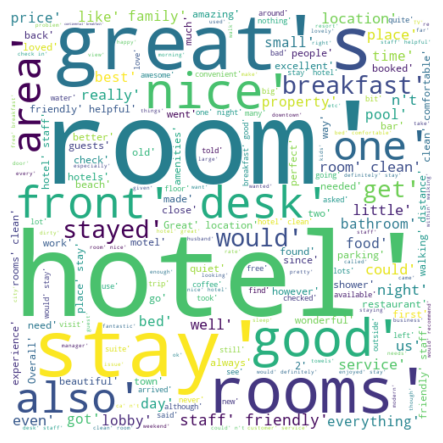

In [64]:
# wordcloud
# stm_pos is an array full of positive-ranked words only
wordcloud = wc.WordCloud(background_color="white", mode="RGB", width=500, height=500)
print(rtext_flat[:10])
print(str(rtext_flat))
wordcloud.generate(str(rtext_flat))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()